In [2]:
import tensorflow as tf

In [3]:
import numpy as np


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [4]:
tf.random.set_seed(1)
np.random.seed(1)

In [5]:
X = np.random.uniform( low=-1, high=1, size=(200, 2) )

In [6]:
X

array([[-1.65955991e-01,  4.40648987e-01],
       [-9.99771250e-01, -3.95334855e-01],
       [-7.06488218e-01, -8.15322810e-01],
       [-6.27479577e-01, -3.08878546e-01],
       [-2.06465052e-01,  7.76334680e-02],
       [-1.61610971e-01,  3.70439001e-01],
       [-5.91095501e-01,  7.56234873e-01],
       [-9.45224814e-01,  3.40935020e-01],
       [-1.65390395e-01,  1.17379657e-01],
       [-7.19226123e-01, -6.03797022e-01],
       [ 6.01489137e-01,  9.36523151e-01],
       [-3.73151644e-01,  3.84645231e-01],
       [ 7.52778305e-01,  7.89213327e-01],
       [-8.29911577e-01, -9.21890434e-01],
       [-6.60339161e-01,  7.56285007e-01],
       [-8.03306332e-01, -1.57784750e-01],
       [ 9.15779060e-01,  6.63305699e-02],
       [ 3.83754228e-01, -3.68968738e-01],
       [ 3.73001855e-01,  6.69251344e-01],
       [-9.63423445e-01,  5.00288630e-01],
       [ 9.77722178e-01,  4.96331309e-01],
       [-4.39112016e-01,  5.78558657e-01],
       [-7.93547987e-01, -1.04212948e-01],
       [ 8.

In [7]:
y = np.ones( len(X) )

In [8]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
y[ X[:, 0] * X[:, 1] < 0 ] = 0
y

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

In [10]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


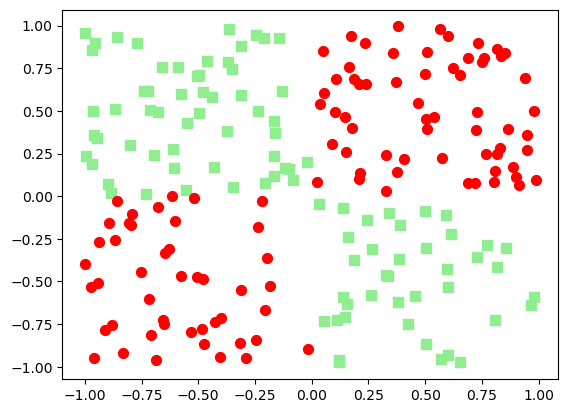

In [11]:
plt.scatter(X[ y==0 ,0], X[ y==0 , 1], s=50, c='lightgreen',marker='s', label='class0')
plt.scatter(X[ y==1 ,0], X[y==1 , 1], s=50, c='red', marker='o', label='class1')
plt.show()

In [ ]:
X_train = X[:100, :]
Y_train = y[:100]

X_test = X[100:, :]
Y_test = y[100:]

In [ ]:
model = tf.keras.Sequential()
model.add( tf.keras.layers.Dense(units=50, input_shape=(2,), activation='relu') )
model.add( tf.keras.layers.Dense(units=50, activation='relu'))
model.add( tf.keras.layers.Dense(units=50, activation='relu'))
model.add( tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:

model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy() ]
)


In [ ]:
history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs=200,
    batch_size=8,
    verbose=1
)

In [ ]:
plt.plot( history.history['binary_accuracy'] )                 ##train
plt.plot( history.history['val_binary_accuracy'] )             ##test
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred
y_pred_labels = (y_pred > 0.5).astype(int)
precision = precision_score(Y_test, y_pred_labels, zero_division=1)
recall = recall_score(Y_test, y_pred_labels)
f1 = 2* recall * precision / (recall + precision)

print("Precision \t: ", precision)
print("Recall: \t", recall)
print("F1: \t", f1)

In [ ]:
model.save('XORmodel_2.h5')

## Model 3

In [ ]:
model3 = tf.keras.Sequential()
model3.add( tf.keras.layers.Dense(units=40, input_shape=(2,), activation='relu') )
model3.add( tf.keras.layers.Dense(units=80, activation='tanh'))
model3.add( tf.keras.layers.Dense(units=40, activation='relu'))
model3.add( tf.keras.layers.Dense(units=10, activation='tanh' ))
model3.add( tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model3.summary()

In [ ]:

model3.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy() ]
)


In [ ]:
history = model3.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs=200,
    batch_size=8,
    verbose=1
)

In [ ]:
plt.plot( history.history['binary_accuracy'] )                 ##train
plt.plot( history.history['val_binary_accuracy'] )             ##test
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
y_pred = model3.predict(X_test)
y_pred
y_pred_labels = (y_pred > 0.5).astype(int)
precision = precision_score(Y_test, y_pred_labels, zero_division=1)
recall = recall_score(Y_test, y_pred_labels)
f1 = 2* recall * precision / (recall + precision)

print("Precision : ", precision)
print("Recall: ", recall)
print("F1: ", f1)

In [ ]:
model3.save('XORmodel_3.h5')